# Part 1(a)

Submitted by: Niv.S 0895, Itay.M 4440 

Email: niv.saban@gmail.com, itaym435@gmail.com

Dataset: Titanic

Objective: To classify Titanic passengers as survived or not survived based on their personal attributes.

# Part 1(b)
AI agent that used - Chat-GPT & Gemini

"Create a bar chart for survival rates by gender, a histogram for the age distribution of survivors, and a scatter plot showing the relationship between SibSp and Parch for survivors."

"Normalize the Age and Fare columns in the dataset."

"Write the code for KNN and Decision Tree algorithms, including a GridSearchCV to tune at least two relevant hyperparameters for each algorithm."

"Compare the performance of the algorithms with and without data normalization."

"Create a visualization of the models' performance as a function of the feature selection results."

"Display the results in a table showing the individual scores for each of the 5 cross-validation folds, along with the mean score for each permutation."

"Generate a classification report for the final model on the test set, displaying precision, recall, and F1 scores for each class in a clear tabular format."

"Predict on the independent test set, display the first 5 predictions vs. true labels, plot the confusion matrix, and evaluate model stability with 5-fold F1-macro cross-validation."

# ◊ë◊¢◊ô◊ô◊™ ◊î◊ú◊û◊ô◊ì◊î ◊ï◊îdataSet

◊ë◊¢◊ô◊ô◊™ ◊î◊ú◊û◊ô◊ì◊î ◊î◊ô◊ê ◊û◊©◊ô◊û◊™ ◊°◊ô◊ï◊ï◊í ◊ë◊ô◊†◊ê◊®◊ô ◊©◊û◊ò◊®◊™◊î ◊ú◊ó◊ñ◊ï◊™ ◊î◊ê◊ù ◊†◊ï◊°◊¢ ◊¢◊ú ◊°◊§◊ô◊†◊™ ◊î◊ò◊ô◊ò◊ê◊†◊ô◊ß ◊©◊®◊ì ◊ê◊™ ◊î◊ê◊°◊ï◊ü (◊¢◊®◊ö 1) ◊ê◊ï ◊ú◊ê (◊¢◊®◊ö 0). ◊°◊ò ◊î◊†◊™◊ï◊†◊ô◊ù (dataset) ◊û◊°◊§◊ß ◊û◊ô◊ì◊¢ ◊ì◊û◊ï◊í◊®◊§◊ô ◊ï◊§◊®◊ò◊ô ◊†◊°◊ô◊¢◊î ◊¢◊ú ◊î◊†◊ï◊°◊¢◊ô◊ù, ◊î◊õ◊ï◊ú◊ú ◊û◊ê◊§◊ô◊ô◊†◊ô◊ù ◊û◊®◊õ◊ñ◊ô◊ô◊ù ◊õ◊û◊ï ◊û◊ô◊ü, ◊í◊ô◊ú, ◊û◊ó◊ú◊ß◊™ ◊î◊†◊°◊ô◊¢◊î (Pclass), ◊û◊°◊§◊® ◊ë◊†◊ô ◊î◊û◊©◊§◊ó◊î ◊¢◊ú ◊î◊°◊ô◊§◊ï◊ü (SibSp, Parch), ◊ï◊î◊û◊ó◊ô◊® ◊©◊©◊ï◊ú◊ù ◊¢◊ë◊ï◊® ◊î◊õ◊®◊ò◊ô◊° (Fare). ◊ë◊ê◊û◊¶◊¢◊ï◊™ ◊û◊ê◊§◊ô◊ô◊†◊ô◊ù ◊ê◊ú◊ï, ◊î◊û◊ò◊®◊î ◊î◊ô◊ê ◊ú◊ê◊û◊ü ◊û◊ï◊ì◊ú ◊ó◊ô◊ñ◊ï◊ô ◊©◊ô◊ï◊õ◊ú ◊ú◊î◊õ◊ú◊ô◊ú ◊ï◊ú◊°◊ï◊ï◊í ◊ë◊ê◊ï◊§◊ü ◊û◊ì◊ï◊ô◊ß ◊ê◊™ ◊™◊ï◊¶◊ê◊™ ◊î◊î◊ô◊©◊®◊ì◊ï◊™ ◊¢◊ë◊ï◊® ◊†◊ï◊°◊¢◊ô◊ù ◊©◊ò◊®◊ù ◊†◊®◊ê◊ï.

# ◊ó◊ú◊ß 2 - ◊î◊õ◊†◊î, ◊ò◊¢◊ô◊†◊î, EDA:

◊ò◊¢◊ô◊†◊™ ◊°◊§◊®◊ô◊ï◊™ ◊ï◊ß◊®◊ô◊ê◊™ ◊û◊¢◊®◊õ◊ô ◊î◊†◊™◊ï◊†◊ô◊ù ◊©◊ú ◊î÷ætrain ◊ï◊î÷ætest:


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix

In [3]:
train_df = pd.read_csv("titanic_train.csv")
test_df =  pd.read_csv("titanic_test.csv")

print("Head of - titanic_train.csv")
display(train_df.head())
print("Head of - titanic_test.csv")
display(test_df.head())

Head of - titanic_train.csv


Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Head of - titanic_test.csv


Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1

**◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊ñ◊¶◊ô◊î 1: ◊°◊ò◊ò◊ô◊°◊ò◊ô◊ß◊î ◊™◊ô◊ê◊ï◊®◊ô◊™ ◊¢◊ë◊ï◊® ◊î◊©◊ï◊®◊ì◊ô◊ù**

**◊™◊ï◊¢◊ú◊™:** ◊û◊°◊§◊ß◊™ ◊™◊ï◊ë◊†◊ï◊™ ◊°◊ò◊ò◊ô◊°◊ò◊ô◊ï◊™ (◊û◊û◊ï◊¶◊¢, ◊°◊ò◊ô◊ô◊™ ◊™◊ß◊ü, ◊®◊ë◊¢◊ï◊†◊ô◊ù) ◊¢◊ú ◊î◊©◊ï◊®◊ì◊ô◊ù ◊ë◊ú◊ë◊ì. ◊ñ◊î ◊¢◊ï◊ñ◊® ◊ú◊†◊ï ◊ú◊î◊ë◊ô◊ü ◊ê◊™ ◊í◊ô◊ú◊ù ◊î◊ò◊ô◊§◊ï◊°◊ô, ◊û◊ó◊ô◊® ◊î◊õ◊®◊ò◊ô◊° ◊©◊©◊ô◊ú◊û◊ï, ◊ï◊™◊õ◊ï◊†◊ï◊™ ◊î◊ß◊©◊ï◊®◊ï◊™ ◊ú◊û◊©◊§◊ó◊î.


In [16]:
survived_df = train_df[train_df["Survived"] == 1]
survived_df.describe(include="all")

Pclass         Sex         Age       SibSp       Parch        Fare  \
count  281.000000  281.000000  281.000000  281.000000  281.000000  281.000000   
mean     1.957295    0.313167   28.344165    0.487544    0.459075   48.683468   
std      0.873187    0.464609   13.552237    0.717651    0.778688   68.767186   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.000000    0.000000   22.000000    0.000000    0.000000   12.475000   
50%      2.000000    0.000000   29.699118    0.000000    0.000000   26.000000   
75%      3.000000    1.000000   35.000000    1.000000    1.000000   57.000000   
max      3.000000    1.000000   80.000000    4.000000    5.000000  512.329200   

         Embarked  Survived  
count  281.000000     281.0  
mean     0.451957       1.0  
std      0.664405       0.0  
min      0.000000       1.0  
25%      0.000000       1.0  
50%      0.000000       1.0  
75%      1.000000       1.0  
max      3.000000       1.0

**◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊ñ◊¶◊ô◊î 2: ◊™◊®◊©◊ô◊ù ◊¢◊û◊ï◊ì◊ï◊™ ◊©◊ú ◊©◊ô◊¢◊ï◊®◊ô ◊î◊©◊®◊ô◊ì◊ï◊™ ◊ú◊§◊ô ◊û◊í◊ì◊®**

**◊™◊ï◊¢◊ú◊™:** ◊û◊ê◊§◊©◊® ◊î◊©◊ï◊ï◊ê◊î ◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊™ ◊§◊©◊ï◊ò◊î ◊©◊ú ◊©◊ô◊¢◊ï◊®◊ô ◊î◊©◊®◊ô◊ì◊ï◊™ ◊ë◊ô◊ü ◊í◊ë◊®◊ô◊ù ◊ú◊†◊©◊ô◊ù, ◊ï◊û◊ì◊í◊ô◊© ◊ì◊§◊ï◊°◊ô◊ù ◊ë◊®◊ï◊®◊ô◊ù.


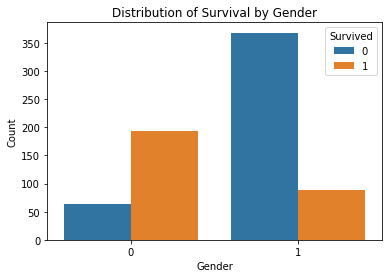

In [17]:
sns.countplot(x="Sex", hue="Survived", data=train_df)
plt.title("Distribution of Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

**◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊ñ◊¶◊ô◊î 3: ◊î◊™◊§◊ú◊í◊ï◊™ ◊í◊ô◊ú ◊ê◊¶◊ú ◊î◊©◊ï◊®◊ì◊ô◊ù**

**◊™◊ï◊¢◊ú◊™:** ◊û◊®◊ê◊î ◊î◊ê◊ù ◊í◊ô◊ú◊ê◊ô◊ù ◊¶◊¢◊ô◊®◊ô◊ù ◊ê◊ï ◊û◊ë◊ï◊í◊®◊ô◊ù ◊†◊ò◊ï ◊ú◊©◊®◊ï◊ì ◊ô◊ï◊™◊®, ◊ï◊û◊ì◊í◊ô◊© ◊ß◊ë◊ï◊¶◊ï◊™ ◊°◊ô◊õ◊ï◊ü ◊û◊ï◊ú ◊ß◊ë◊ï◊¶◊ï◊™ ◊û◊ï◊í◊†◊ï◊™



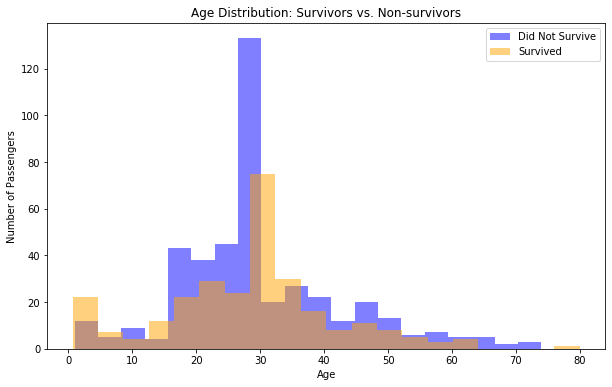

In [12]:
# ◊ô◊¶◊ô◊®◊™ ◊í◊®◊£
plt.figure(figsize=(10, 6))

# ◊î◊™◊§◊ú◊í◊ï◊™ ◊í◊ô◊ú◊ê◊ô◊ù ◊©◊ú ◊û◊ô ◊©◊ú◊ê ◊©◊®◊ì◊ï (Survived == 0)
train_df[train_df['Survived'] == 0]['Age'].dropna().plot(kind='hist', bins=20, alpha=0.5, label='Did Not Survive', color='blue')

# ◊î◊™◊§◊ú◊í◊ï◊™ ◊í◊ô◊ú◊ê◊ô◊ù ◊©◊ú ◊û◊ô ◊©◊©◊®◊ì◊ï (Survived == 1)
train_df[train_df['Survived'] == 1]['Age'].dropna().plot(kind='hist', bins=20, alpha=0.5, label='Survived', color='orange')

plt.title("Age Distribution: Survivors vs. Non-survivors")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

**◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊ñ◊¶◊ô◊î 4: ◊ß◊©◊® ◊ë◊ô◊ü SibSp ◊ú÷æParch ◊ê◊¶◊ú ◊î◊©◊ï◊®◊ì◊ô◊ù**

**◊™◊ï◊¢◊ú◊™:** ◊û◊ê◊§◊©◊® ◊ú◊î◊ë◊ô◊ü ◊ê◊™ ◊î◊©◊§◊¢◊™ ◊û◊ë◊†◊î ◊î◊û◊©◊§◊ó◊î ◊¢◊ú ◊î◊©◊®◊ô◊ì◊ï◊™, ◊ï◊ë◊§◊®◊ò ◊ê◊ù ◊ú◊û◊©◊§◊ó◊ï◊™ ◊û◊°◊ï◊í ◊û◊°◊ï◊ô◊ô◊ù ◊î◊ô◊î ◊°◊ô◊õ◊ï◊ô ◊ò◊ï◊ë ◊ô◊ï◊™◊® ◊ú◊©◊®◊ï◊ì.

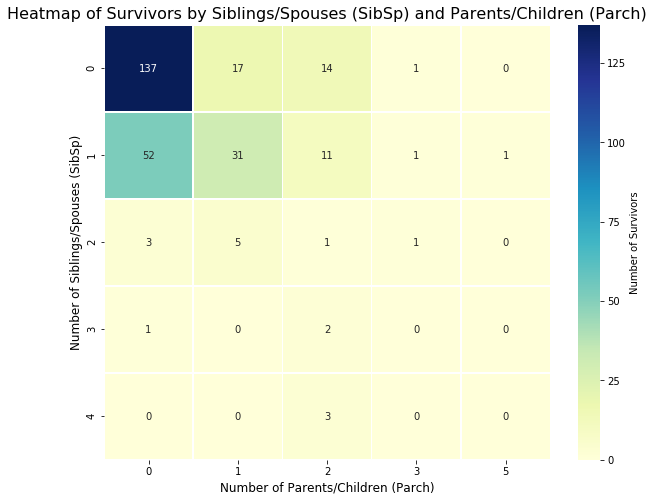

In [13]:

survivors_df = train_df[train_df['Survived'] == 1]

survivor_family_crosstab = pd.crosstab(survivors_df['SibSp'], survivors_df['Parch'])

plt.figure(figsize=(10, 8))

sns.heatmap(survivor_family_crosstab,
            annot=True,     # Show the numerical values on the map
            fmt='d',        # Format the numbers as integers
            cmap='YlGnBu',  # Choose a color palette
            linewidths=.5,  # Add lines between cells for better separation
            cbar_kws={'label': 'Number of Survivors'}) # Label the color bar

plt.title('Heatmap of Survivors by Siblings/Spouses (SibSp) and Parents/Children (Parch)', fontsize=16)
plt.xlabel('Number of Parents/Children (Parch)', fontsize=12)
plt.ylabel('Number of Siblings/Spouses (SibSp)', fontsize=12)

plt.show()

# ◊ó◊ú◊ß 3 ◊î◊†◊ô◊°◊ï◊ô◊ô◊ù:

Feature Engineering

◊™◊î◊ú◊ô◊ö ◊î◊†◊ì◊°◊™ ◊î◊û◊ê◊§◊ô◊ô◊†◊ô◊ù (Feature Engineering) ◊ë◊§◊®◊ï◊ô◊ß◊ò ◊ñ◊î ◊õ◊ú◊ú ◊û◊°◊§◊® ◊©◊ú◊ë◊ô◊ù ◊ß◊®◊ô◊ò◊ô◊ô◊ù ◊ú◊î◊õ◊†◊™ ◊î◊†◊™◊ï◊†◊ô◊ù, ◊ê◊©◊® ◊ë◊ï◊¶◊¢◊ï ◊ë◊ê◊ï◊§◊ü ◊û◊ê◊ï◊®◊í◊ü ◊ë◊ê◊û◊¶◊¢◊ï◊™ ColumnTransformer. ◊®◊ê◊©◊ô◊™, ◊î◊û◊ê◊§◊ô◊ô◊†◊ô◊ù ◊ó◊ï◊ú◊ß◊ï ◊ú◊©◊™◊ô ◊ß◊ë◊ï◊¶◊ï◊™: ◊†◊ï◊û◊®◊ô◊ô◊ù ◊ï◊ß◊ò◊í◊ï◊®◊ô◊ê◊ú◊ô◊ô◊ù. ◊¢◊ú ◊î◊û◊ê◊§◊ô◊ô◊†◊ô◊ù ◊î◊†◊ï◊û◊®◊ô◊ô◊ù (◊õ◊í◊ï◊ü 'Age' ◊ï-'Fare') ◊î◊ï◊§◊¢◊ú ◊†◊ô◊®◊û◊ï◊ú (StandardScaler) ◊¢◊ú ◊û◊†◊™ ◊ú◊î◊ë◊ô◊ê◊ù ◊ú◊°◊ï◊ú◊ù ◊ê◊ó◊ô◊ì, ◊©◊ú◊ë ◊©◊î◊ô◊†◊ï ◊ó◊ô◊ï◊†◊ô ◊ë◊û◊ô◊ï◊ó◊ì ◊¢◊ë◊ï◊® ◊û◊ï◊ì◊ú◊ô◊ù ◊î◊®◊í◊ô◊©◊ô◊ù ◊ú◊û◊®◊ó◊ß◊ô◊ù ◊õ◊û◊ï KNN. ◊ë◊û◊ß◊ë◊ô◊ú, ◊î◊û◊ê◊§◊ô◊ô◊†◊ô◊ù ◊î◊ß◊ò◊í◊ï◊®◊ô◊ê◊ú◊ô◊ô◊ù (◊õ◊í◊ï◊ü 'Pclass' ◊ï-'Sex') ◊¢◊ë◊®◊ï ◊ß◊ô◊ì◊ï◊ì ◊û◊°◊ï◊í OneHotEncoder ◊©◊î◊û◊ô◊® ◊ê◊ï◊™◊ù ◊ú◊ô◊ô◊¶◊ï◊í ◊û◊°◊§◊®◊ô ◊ë◊ô◊†◊ê◊®◊ô

In [19]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- ◊©◊ú◊ë 2: ◊ë◊†◊ô◊ô◊™ ◊™◊î◊ú◊ô◊ö ◊¢◊ô◊ë◊ï◊ì ◊î◊†◊™◊ï◊†◊ô◊ù ◊î◊û◊ß◊ì◊ô◊ù (Preprocessor) ---
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

**◊î◊™◊†◊°◊ï◊™ ◊ë◊û◊ï◊ì◊ú◊ô◊ù**


In [40]:
# --- GridSearch KNN ◊¢◊ù Feature Selection ---
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=f_classif)),
    ('classifier', KNeighborsClassifier())
])

param_grid_knn = {
    'preprocessor__numeric__scaler': [StandardScaler(), None],
    'feature_selector__k': [3, 5, 7, 9],
    'classifier__n_neighbors': [5, 7, 9],
    'classifier__weights': ['uniform', 'distance']
}

grid_search_kbest_knn = GridSearchCV(
    pipeline_knn, param_grid_knn, cv=5, scoring='f1_macro', verbose=0, return_train_score=False
)
grid_search_kbest_knn.fit(X_train, y_train)

# --- GridSearch Decision Tree ◊¢◊ù Feature Selection ---
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=f_classif)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

param_grid_dt = {
    'preprocessor__numeric__scaler': [StandardScaler(), None],
    'feature_selector__k': [3, 5, 7],
    'classifier__max_depth': [5, 7, 10],
    'classifier__min_samples_leaf': [5, 10]
}

grid_search_kbest_dt = GridSearchCV(
    pipeline_dt, param_grid_dt, cv=5, scoring='f1_macro', verbose=0, return_train_score=False
)
grid_search_kbest_dt.fit(X_train, y_train)

# --- ◊ô◊¶◊ô◊®◊™ DataFrame ◊ú◊î◊¶◊í◊î ◊¢◊ù ◊©◊û◊ï◊™ ◊¢◊û◊ï◊ì◊ï◊™ ◊†◊ß◊ô◊ô◊ù ---
results_knn_df = pd.DataFrame(grid_search_kbest_knn.cv_results_)
results_dt_df = pd.DataFrame(grid_search_kbest_dt.cv_results_)

# --- ◊¢◊û◊ï◊ì◊ï◊™ ◊†◊ß◊ô◊ï◊™ ◊ú-KNN ---
cols_knn = [
    'param_classifier__n_neighbors',
    'param_classifier__weights',
    'param_feature_selector__k',
    'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score',
    'mean_test_score',
    'rank_test_score'
]

# --- ◊¢◊û◊ï◊ì◊ï◊™ ◊†◊ß◊ô◊ï◊™ ◊ú-Decision Tree ---
cols_dt = [
    'param_classifier__max_depth',
    'param_classifier__min_samples_leaf',
    'param_feature_selector__k',
    'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score',
    'mean_test_score',
    'rank_test_score'
]

# --- ◊î◊¶◊í◊™ Top 10 KNN ---
display(
    results_knn_df[cols_knn]
    .rename(columns={
        'param_classifier__n_neighbors': 'n_neighbors',
        'param_classifier__weights': 'weights',
        'param_feature_selector__k': 'k_features',
        'split0_test_score': 'fold_0',
        'split1_test_score': 'fold_1',
        'split2_test_score': 'fold_2',
        'split3_test_score': 'fold_3',
        'split4_test_score': 'fold_4',
        'mean_test_score': 'mean_score',
        'rank_test_score': 'rank'
    })
    .sort_values(by='rank')
    .head(10)
)

# --- ◊î◊¶◊í◊™ Top 10 Decision Tree ---
display(
    results_dt_df[cols_dt]
    .rename(columns={
        'param_classifier__max_depth': 'max_depth',
        'param_classifier__min_samples_leaf': 'min_samples_leaf',
        'param_feature_selector__k': 'k_features',
        'split0_test_score': 'fold_0',
        'split1_test_score': 'fold_1',
        'split2_test_score': 'fold_2',
        'split3_test_score': 'fold_3',
        'split4_test_score': 'fold_4',
        'mean_test_score': 'mean_score',
        'rank_test_score': 'rank'
    })
    .sort_values(by='rank')
    .head(10)
)


C:\Users\nivsa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


n_neighbors   weights k_features    fold_0    fold_1    fold_2    fold_3    fold_4  mean_score  rank
34           9   uniform          5  0.833442  0.788176  0.777249  0.823429  0.726575    0.789885     1
36           9   uniform          7  0.791159  0.809556  0.752422  0.821802  0.737209    0.782509     2
10           5  distance          5  0.817775  0.801080  0.744246  0.824913  0.710328    0.779790     3
26           7  distance          5  0.834783  0.792659  0.746771  0.804842  0.710328    0.777995     4
44           9  distance          7  0.817775  0.757288  0.777922  0.796429  0.739460    0.777842     5
18           7   uniform          5  0.807973  0.773810  0.741497  0.804842  0.737209    0.773129     6
38           9   uniform          9  0.806483  0.752422  0.741497  0.833442  0.729017    0.772649     7
11           5  distance          5  0.821802  0.771467  0.751192  0.814935  0.694169    0.770847     8
42           9  distance          5  0.834783  0.766154  0.746771  0.804842  0.688861    0.768422     9
46           9  distance          9  0.796429  0.760645  0.759416  0.791159  0.720850    0.765778    10

max_depth min_samples_leaf k_features    fold_0    fold_1    fold_2    fold_3    fold_4  mean_score  rank
33        10               10          5  0.823429  0.759916  0.782135  0.847645  0.745432    0.791793     1
21         7               10          5  0.823429  0.759916  0.782135  0.847645  0.745432    0.791793     1
20         7               10          5  0.823429  0.759916  0.782135  0.847645  0.745432    0.791793     1
32        10               10          5  0.823429  0.759916  0.782135  0.847645  0.745432    0.791793     1
8          5               10          5  0.828600  0.732007  0.779793  0.847645  0.741503    0.785988     5
9          5               10          5  0.828600  0.732007  0.779793  0.847645  0.741503    0.785988     5
2          5                5          5  0.823429  0.719902  0.782135  0.842015  0.735063    0.780589     7
3          5                5          5  0.823429  0.719902  0.782135  0.842015  0.735063    0.780589     7
30        10               10          3  0.806483  0.754960  0.775958  0.796429  0.739460    0.774720     9
31        10               10          3  0.806483  0.754960  0.775958  0.796429  0.739460    0.774720     9

◊î◊¶◊í◊î ◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊™ ◊©◊ú ◊î◊ô◊ó◊° ◊ë◊ô◊ü ◊î◊ê◊ú◊ï◊í◊®◊ô◊™◊û◊ô◊ù ◊ú◊§◊†◊ô ◊†◊ô◊®◊û◊ï◊ú ◊î◊†◊™◊ï◊†◊ô◊ù ◊ï◊ú◊ê◊ó◊® ◊û◊õ◊ü

--- Running GridSearchCV for KNN (with/without scaling) ---
Done.

--- Running GridSearchCV for Decision Tree (with/without scaling) ---
Done.



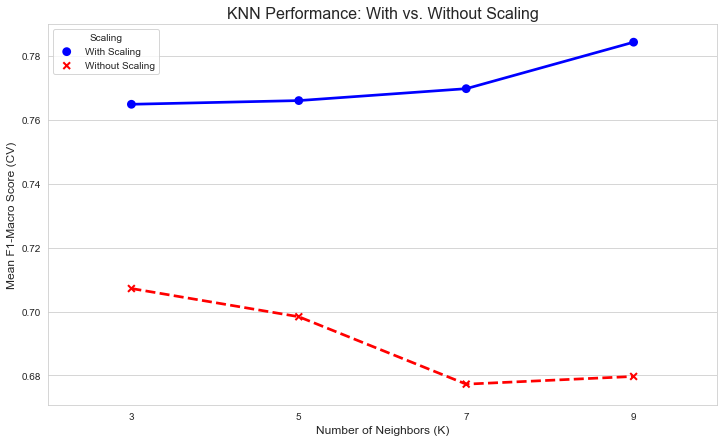

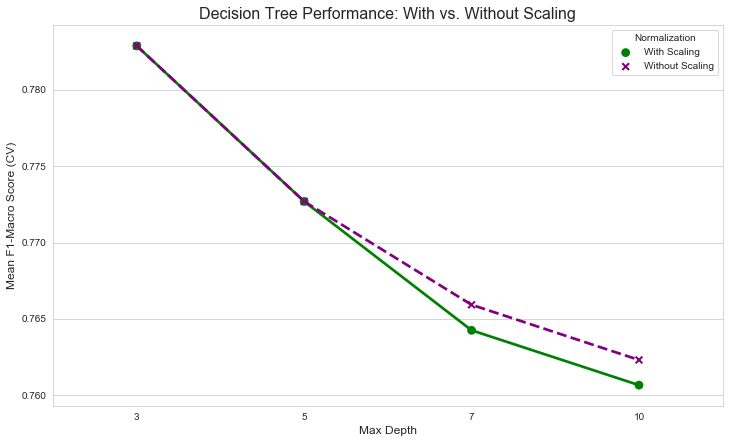

In [37]:
# --- ◊î◊í◊ì◊®◊™ ◊§◊ï◊†◊ß◊¶◊ô◊î ◊ú◊¢◊ô◊¶◊ï◊ë ◊©◊ù ◊î◊°◊ß◊ô◊ô◊ú◊® ---
def clean_scaler_name(scaler):
    if isinstance(scaler, StandardScaler):
        return 'With Scaling'
    return 'Without Scaling'

# --- GridSearch ◊¢◊ë◊ï◊® KNN (◊¢◊ù ◊ï◊ë◊ú◊ô ◊†◊ô◊®◊û◊ï◊ú) ---
print("--- Running GridSearchCV for KNN (with/without scaling) ---")
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])
param_grid_knn = {
    'preprocessor__numeric__scaler': [StandardScaler(), None],
    'classifier__n_neighbors': [3, 5, 7, 9]
}
grid_search_knn_scaling = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='f1_macro')
grid_search_knn_scaling.fit(X_train, y_train)

# ◊ô◊¶◊ô◊®◊™ DataFrame ◊û◊î◊™◊ï◊¶◊ê◊ï◊™ *◊ê◊ó◊®◊ô* ◊î◊®◊ô◊¶◊î
knn_results_df = pd.DataFrame(grid_search_knn_scaling.cv_results_)
knn_results_df['Scaler Type'] = knn_results_df['param_preprocessor__numeric__scaler'].apply(clean_scaler_name)
print("Done.\n")

# --- GridSearch ◊¢◊ë◊ï◊® Decision Tree (◊¢◊ù ◊ï◊ë◊ú◊ô ◊†◊ô◊®◊û◊ï◊ú) ---
print("--- Running GridSearchCV for Decision Tree (with/without scaling) ---")
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
param_grid_dt = {
    'preprocessor__numeric__scaler': [StandardScaler(), None],
    'classifier__max_depth': [3, 5, 7, 10]
}
grid_search_dt_scaling = GridSearchCV(dt_pipeline, param_grid_dt, cv=5, scoring='f1_macro')
grid_search_dt_scaling.fit(X_train, y_train)

# ◊ô◊¶◊ô◊®◊™ DataFrame ◊û◊î◊™◊ï◊¶◊ê◊ï◊™ *◊ê◊ó◊®◊ô* ◊î◊®◊ô◊¶◊î
dt_results_df = pd.DataFrame(grid_search_dt_scaling.cv_results_)
dt_results_df['Scaler Type'] = dt_results_df['param_preprocessor__numeric__scaler'].apply(clean_scaler_name)
print("Done.\n")

# --- ◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊ñ◊¶◊ô◊î 2: ◊†◊ô◊™◊ï◊ó ◊î◊©◊§◊¢◊™ ◊î◊†◊ô◊®◊û◊ï◊ú ◊¢◊ú KNN ---
plt.figure(figsize=(12, 7))
sns.pointplot(data=knn_results_df, x='param_classifier__n_neighbors', y='mean_test_score', hue='Scaler Type', palette={'With Scaling': 'blue', 'Without Scaling': 'red'}, markers=['o', 'x'], linestyles=['-', '--'])
plt.title('KNN Performance: With vs. Without Scaling', fontsize=16)
plt.xlabel('Number of Neighbors (K)', fontsize=12)
plt.ylabel('Mean F1-Macro Score (CV)', fontsize=12)
plt.legend(title='Scaling')
plt.show()

# --- ◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊ñ◊¶◊ô◊î 3: ◊†◊ô◊™◊ï◊ó ◊î◊©◊§◊¢◊™ ◊î◊†◊ô◊®◊û◊ï◊ú ◊¢◊ú ◊¢◊• ◊î◊ó◊ú◊ò◊î ---
plt.figure(figsize=(12, 7))
sns.pointplot(data=dt_results_df, x='param_classifier__max_depth', y='mean_test_score', hue='Scaler Type', palette={'With Scaling': 'green', 'Without Scaling': 'purple'}, markers=['o', 'x'], linestyles=['-', '--'])
plt.title('Decision Tree Performance: With vs. Without Scaling', fontsize=16)
plt.xlabel('Max Depth', fontsize=12)
plt.ylabel('Mean F1-Macro Score (CV)', fontsize=12)
plt.legend(title='Normalization')
plt.show()

◊ë◊ó◊ô◊®◊™ ◊î◊ê◊ú◊í◊ï◊®◊ô◊™◊ù ◊î◊û◊†◊¶◊ó ◊¢◊ù ◊î◊§◊®◊ï◊û◊ò◊¶◊ô◊ï◊™ ◊î◊û◊ï◊¶◊ú◊ó◊ï◊™ ◊ë◊ô◊ï◊™◊®

In [34]:
# --- ◊î◊õ◊®◊ñ◊™ ◊î◊ê◊ú◊í◊ï◊®◊ô◊™◊ù ◊î◊û◊†◊¶◊ó ---
best_score_knn = grid_search_kbest_knn.best_score_
best_score_dt = grid_search_kbest_dt.best_score_
best_k_knn = grid_search_kbest_knn.best_params_['feature_selector__k']
best_k_dt = grid_search_kbest_dt.best_params_['feature_selector__k']

print("\n" + "="*50)
print("     Final Conclusion & Winning Model")
print("="*50)

if best_score_knn > best_score_dt:
    print("üèÜ The winning model is: KNN with SelectKBest")
    print(f"   - Best Mean Score: {best_score_knn:.4f}")
    print(f"   - Optimal Number of Features: {best_k_knn}")
    print(f"   - Best Parameters: {grid_search_kbest_knn.best_params_}")
elif best_score_dt > best_score_knn:
    print("üèÜ The winning model is: Decision Tree with SelectKBest")
    print(f"   - Best Mean Score: {best_score_dt:.4f}")
    print(f"   - Optimal Number of Features: {best_k_dt}")
    print(f"   - Best Parameters: {grid_search_kbest_dt.best_params_}")
else:
    print("üèÜ It's a tie! Both models achieved the same mean score.")
    print(f"   - KNN: Score {best_score_knn:.4f} with {best_k_knn} features.")
    print(f"   - Decision Tree: Score {best_score_dt:.4f} with {best_k_dt} features.")


     Final Conclusion & Winning Model
üèÜ The winning model is: Decision Tree with SelectKBest
   - Best Mean Score: 0.7918
   - Optimal Number of Features: 5
   - Best Parameters: {'classifier__max_depth': 7, 'classifier__min_samples_leaf': 10, 'feature_selector__k': 5, 'preprocessor__numeric__scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


# ◊ó◊ú◊ß 4 ◊ê◊ô◊û◊ï◊ü

◊ú◊ê◊ó◊® ◊©◊í◊ô◊ú◊ô◊†◊ï ◊©◊î◊ê◊ú◊í◊ï◊®◊ô◊™◊ù ◊î◊û◊ï◊¶◊ú◊ó ◊î◊ï◊ê ◊¢◊• ◊î◊î◊ó◊ú◊ò◊î ◊ú◊ú◊ê ◊ô◊¶◊ô◊®◊™ ◊î◊™◊õ◊ï◊†◊î ◊î◊ó◊ì◊©◊î,
◊õ◊¢◊™ ◊†◊ê◊û◊ü ◊ê◊™ ◊î◊û◊ï◊ì◊ú ◊û◊ó◊ì◊© ◊ú◊§◊ô ◊î◊ß◊ï◊û◊ô◊ë◊†◊¶◊ô◊î ◊î◊ñ◊ï

In [35]:
# --- ◊î◊í◊ì◊®◊™ ◊î-Pipeline ◊î◊°◊ï◊§◊ô ◊¢◊ù ◊î◊§◊®◊û◊ò◊®◊ô◊ù ◊î◊û◊†◊¶◊ó◊ô◊ù ---
# ◊î◊§◊®◊û◊ò◊®◊ô◊ù ◊î◊ù ◊ê◊ú◊ï ◊©◊î◊™◊ß◊ë◊ú◊ï ◊û◊î◊î◊®◊¶◊î ◊î◊ß◊ï◊ì◊û◊™: ◊¢◊• ◊î◊ó◊ú◊ò◊î ◊¢◊ù 5 ◊û◊ê◊§◊ô◊ô◊†◊ô◊ù
final_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=f_classif, k=5)),
    ('classifier', DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=42))
])

# --- ◊ê◊ô◊û◊ï◊ü ◊î◊û◊ï◊ì◊ú ◊î◊°◊ï◊§◊ô ◊¢◊ú ◊õ◊ú ◊°◊ò ◊î◊ê◊ô◊û◊ï◊ü (X_train, y_train) ---
print("--- Training the final winning model on the entire training set... ---")
final_model_pipeline.fit(X_train, y_train)

print("\n‚úÖ Done!")
print("The final model is now trained and ready for evaluation on the test set in the next step.")

--- Training the final winning model on the entire training set... ---

‚úÖ Done!
The final model is now trained and ready for evaluation on the test set in the next step.


# ◊ó◊ú◊ß 5 - ◊ó◊ô◊ñ◊ï◊ô ◊ï◊ë◊ì◊ô◊ß◊™ ◊ê◊ô◊õ◊ï◊™

Actual Value  Model Prediction
0             0                 0
1             0                 0
2             0                 0
3             0                 1
4             1                 0

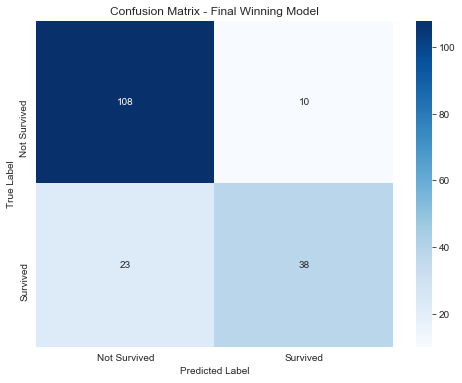


Cross-validation on test_df (5 folds, independent evaluation):
Fold 1: 0.7533
Fold 2: 0.7305
Fold 3: 0.7243
Fold 4: 0.6759
Fold 5: 0.8600

Mean F1 Score across 5 folds (test_df): 0.7488


In [36]:
X_test_final = test_df.drop('Survived', axis=1)
y_test_final = test_df['Survived']

# ◊ó◊ô◊ñ◊ï◊ô ◊¢◊ú ◊°◊ò ◊î◊û◊ë◊ó◊ü
y_pred_final = final_model_pipeline.predict(X_test_final)

comparison_df_head = pd.DataFrame({
    'Actual Value': y_test_final.head(5).values,
    'Model Prediction': y_pred_final[:5]
})
display(comparison_df_head)

# --- ◊©◊ú◊ë 2: ◊û◊ò◊®◊ô◊¶◊™ ◊ë◊ú◊ë◊ï◊ú ---
cm = confusion_matrix(y_test_final, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix - Final Winning Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# --- ◊©◊ú◊ë 5: Cross-validation ◊¢◊¶◊û◊ê◊ô ◊¢◊ú test_df ---
cv_scores_eval = cross_val_score(final_model_pipeline, X_test_final, y_test_final, cv=5, scoring="f1_macro")

print("\nCross-validation on test_df (5 folds, independent evaluation):")
for i, score in enumerate(cv_scores_eval, 1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nMean F1 Score across 5 folds (test_df): {np.mean(cv_scores_eval):.4f}")